### Identity Acquisition

{1: 0.9022222222222223, 2: 0.13402061855670103, 3: 0.27586206896551724, 4: 0.45454545454545453, 5: 0.075, 6: 0.0, 7: 0.0, 8: 0.5094339622641509, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.125, 15: 0.027777777777777776, 16: 0.32, 17: 0.03125, 18: 0.41509433962264153, 19: 0.0, 20: 0.017543859649122806, 21: 0.1, 22: 0.0, 23: 0.023255813953488372, 24: 0.18023255813953487, 25: 0.047619047619047616, 26: 0.4681818181818182, 27: 0.008064516129032258, 28: 0.010869565217391304, 29: 0.05217391304347826, 30: 0.04827586206896552, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.3333333333333333, 36: 0.07216494845360824, 37: 0.03389830508474576, 38: 0.015151515151515152, 39: 0.037037037037037035, 40: 0.1320754716981132, 41: 0.0, 42: 0.037037037037037035, 43: 0.0, 44: 0.0, 45: 0.011235955056179775, 46: 0.0, 47: 0.02857142857142857, 48: 0.0, 49: 0.1, 50: 0.012987012987012988, 51: 0.0, 52: 0.0, 53: 0.14285714285714285, 54: 0.11267605633802817, 55: 0.018518518518518517, 56: 0.020833333333333332, 57: 0.1

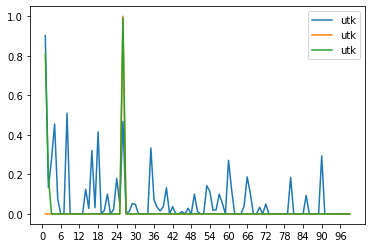

In [17]:
# How accurate for each particular age? (Insta + BM)

# --------------------
# ACCURACY
# - BM - Insta
# --------------------
# IS AGE CLASSIFICATION FEASABLE IN GENERAL AND FOR WHAT AGE IN SPECIFIC?
# 1) Bar Chart with mean accuracy per age

import pickle
import numpy as np
import csv
import matplotlib.pyplot as plt

countries = {
    "australia": "0",
    "brazil": "1",
    "canada": "2",
    "china": "3",
    "ethiopia": "4",
    "nigeria": "4",
    "germany": "5",
    "india": "6",
    "indonesia": "7",
    "iran": "8",
    "russia": "9"
}

def plot_accuracy(net, dataset, bin, country = 'all'):

    path = './result_data/%s/pickle_%s_test_part_%s_bin_%s' %(dataset, net, dataset, bin)
    with open(path,'rb') as f:
        output = pickle.load(f)

#     output_data = []
#     output_data.append(['Label','Label Age','Age Accuracy'])
    acc_age_correct = {}
    acc_age_total = {}
    acc_age_mean = {}
    acc_exact_age = {}

    for result in output:
        
        # insta_labels: [age]_[country]_[username]
        # utk_labels: [age]_[gender]_[race]_[date&time].jpg
        
        path = result['path']                       # /folder/folder/folder/
        name = result['name']                       # 12_1_@justinbieber
        exact_age = name.split('_')[0]              # 21 years
#         country_index = name.split('_')[1]
#         country_name = list(countries.keys())[list(countries.values()).index(country_index)]
        label_str = result['label-str']             # actual age10-19
        pred_label_str = result['pred-label-str']   # perceived age20-29
        label_num = result['label-num']             # 1
        pred_label_num = result['pred-label-num']   # 2
        probs = result['probs']                     # [%, %, ..., %]

        if label_num not in acc_age_correct.keys():
            acc_age_correct[label_num] = 0
            acc_age_total[label_num] = 0
            acc_age_mean[label_num] = 0

        # add + 1 for correct classification
        if label_num == pred_label_num:
            acc_age_correct[label_num] = acc_age_correct[label_num] + 1
        # add + 1 to count total age to divide correct count into mean
        acc_age_total[label_num] = acc_age_total[label_num] + 1

    # calc mean for each class
    for label_num in acc_age_correct.keys():
        
        new_num = label_num * bin
        acc_exact_age[new_num] = 0

        acc_exact_age[new_num] = acc_age_correct[label_num] / acc_age_total[label_num]
        acc_age_mean[label_num] = acc_age_correct[label_num] / acc_age_total[label_num]
        output_data.append([label_num,new_num,acc_exact_age[new_num]])

        
#     filename = 'accuracy/general_%s_%s_%s.csv' %(net, bin, country)
#     filename = '%s/accuracy_%s_%s_%s_%s.csv' %(dataset,net, dataset, bin, country)
    
#     with open(filename, 'w') as f:
#         w = csv.writer(f)
#         w.writerows(output_data)

    print(acc_age_mean)
    
    vals = acc_exact_age.keys()        
    lists = sorted(acc_exact_age.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x,y, label = dataset)

    if dataset == 'utk':
        scale = 100
    elif dataset == 'instagram':
        scale = 60
        
    plt.xticks(np.arange(0, scale, 6.0))
    plt.legend()
    

#---------------------------
# ALL RACES
#---------------------------

# plot_accuracy('ResNet','utk',1,'all')
# plot_accuracy('ResNet','instagram',1,'all')
# plot_accuracy('VGG','utk',1,'all')
# plot_accuracy('VGG','instagram',1,'all')
# plot_accuracy('MLP','utk',1,'all')
# plot_accuracy('MLP','instagram',1,'all')

# plot_accuracy('ResNet','utk',6,'all')
# plot_accuracy('ResNet','instagram',6,'all')
# plot_accuracy('VGG','utk',6,'all')
# plot_accuracy('VGG','instagram',6,'all')
# plot_accuracy('MLP','utk',6,'all')
# plot_accuracy('MLP','instagram',6,'all')

# plot_accuracy('ResNet','utk',10,'all')
# plot_accuracy('ResNet','instagram',10,'all')
# plot_accuracy('VGG','utk',10,'all')
# plot_accuracy('VGG','instagram',10,'all')
# plot_accuracy('MLP','utk',10,'all')
# plot_accuracy('MLP','instagram',10,'all')


{1: 0.2755102040816326, 2: 0.17857142857142858, 3: 0.0, 4: 0.0}
{1: 0.282798833819242, 2: 0.22872340425531915, 3: 0.2, 4: 0.0}
{1: 0.3058350100603622, 2: 0.1919191919191919, 3: 0.1, 4: 0.0, 0: 0.0}
{1: 0.30129390018484287, 2: 0.19887955182072828, 3: 0.07692307692307693, 4: 0.0, 0: 0.0}
{1: 0.30124777183600715, 2: 0.19473684210526315, 3: 0.0625, 4: 0.0, 0: 0.0}
{1: 0.30124777183600715, 2: 0.19473684210526315, 3: 0.0625, 4: 0.0, 0: 0.0}
{1: 0.28353658536585363, 2: 0.18619246861924685, 3: 0.058823529411764705, 4: 0.0, 0: 0.0}
{1: 0.28218465539661897, 2: 0.19763513513513514, 3: 0.09523809523809523, 4: 0.0, 0: 0.0}
{1: 0.2807606263982103, 2: 0.1987281399046105, 3: 0.08, 4: 0.0, 0: 0.0}
{1: 0.2815533980582524, 2: 0.21236559139784947, 3: 0.1590909090909091, 4: 0.0, 0: 0.5}
{1: 0.2791353383458647, 2: 0.2193877551020408, 3: 0.15217391304347827, 4: 0.0, 0: 0.5}
{'australia': {1: 0.2791353383458647, 2: 0.2193877551020408, 3: 0.15217391304347827, 4: 0.0, 0: 0.5}, 'brazil': {1: 0.2791353383458647, 

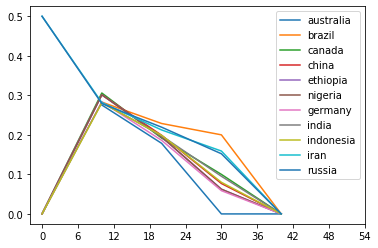

In [748]:
# IS AGE CLASSIFICATION FEASABLE IN GENERAL AND FOR WHAT AGE IN SPECIFIC?
# 1) Bar Chart with mean accuracy per age, and per race
# [age] = mean_age_acc

countries_insta = {
    "australia": "0",
    "brazil": "1",
    "canada": "2",
    "china": "3",
    "ethiopia": "4",
    "nigeria": "4",
    "germany": "5",
    "india": "6",
    "indonesia": "7",
    "iran": "8",
    "russia": "9"
}

import pickle
import numpy as np

def plot_country_accuracy(net, bin):

    path = './data/processed/res/pickle_%s_bin_%s' %(net, bin)
    with open(path,'rb') as f:
        output = pickle.load(f)

#         output_data = []
#         output_data.append(['Country','Label','Label Age','Age Accuracy'])
        acc_age_correct = {}
        acc_age_total = {}
        acc_age_mean = {}
        acc_exact_age = {}
        acc_age_mean_country = {}

        for country in countries.keys():

            for result in output:

                # ------------------------------------
                # Get Info
                # ------------------------------------
                path = result['path']                       # /folder/folder/folder/
                name = result['name']                       # 12_1_@justinbieber
                exact_age = name.split('_')[0]              # 21 years
                country_index = name.split('_')[1]
                country_name = list(countries.keys())[list(countries.values()).index(country_index)]
                label_str = result['label-str']             # actual age10-19
                pred_label_str = result['pred-label-str']   # perceived age20-29
                label_num = result['label-num']             # 1
                pred_label_num = result['pred-label-num']   # 2
                probs = result['probs']                     # [%, %, ..., %]

                # check for right country
                if country_name != country:
                    continue

                if label_num not in acc_age_correct.keys():
                    acc_age_correct[label_num] = 0
                    acc_age_total[label_num] = 0
                    acc_age_mean[label_num] = 0

                # add + 1 for correct classification
                if label_num == pred_label_num:
                    acc_age_correct[label_num] = acc_age_correct[label_num] + 1
                # add + 1 to count total age to divide correct count into mean
                acc_age_total[label_num] = acc_age_total[label_num] + 1

            # calc mean for each class
            for label_num in acc_age_correct.keys():
                new_num = label_num * bin
                acc_exact_age[new_num] = 0
                acc_age_mean[label_num] = acc_age_correct[label_num] / acc_age_total[label_num]
                acc_exact_age[new_num] = acc_age_correct[label_num] / acc_age_total[label_num]
                output_data.append([country,label_num,new_num,acc_exact_age[new_num]])

#                 filename = 'accuracy/countries/accuracy_%s_%s_%s.csv' %(net, bin, country)

            acc_age_mean_country[country] = acc_age_mean
            
            vals = acc_exact_age.keys()        
            lists = sorted(acc_exact_age.items()) # sorted by key, return a list of tuples
            x, y = zip(*lists) # unpack a list of pairs into two tuples
            plt.plot(x,y, label = country)

            plt.xticks(np.arange(0, 60, 6.0))
            plt.legend()
            
            with open(filename, 'w') as f:
                w = csv.writer(f)
                w.writerows(output_data)

            print(acc_age_mean)

# IS AGE CLASSIFICATION FEASABLE IN GENERAL AND FOR WHAT AGE IN SPECIFIC?
# 1) Bar Chart with mean accuracy per age, and per race
# [age] = mean_age_acc

    print(acc_age_mean_country)

    
plot_country_accuracy('ResNet',10)

In [ ]:
# AT WHAT AGE DOES IT GET DIFFICULT TO USE AGE CLASSIFICATION?
# 2) Bar Chart with age range 95% coverage per age -> At what age is it difficult to classify humans


# WHAT RACE IS BEST AND WORST SUITED FOR AGE CLASSIFICATION?
# 3) Bar Chart with age range 95% coverage per race per age -> Where is it even more difficult or less



# AT WHAT AGE DOES IT GET DIFFICULT TO USE AGE CLASSIFICATION?
# 2) Bar Chart with age range 95% coverage per age -> At what age is it difficult to classify humans 

# WHAT RACE IS BEST AND WORST SUITED FOR AGE CLASSIFICATION?
# 3) Bar Chart with age range 95% coverage per race per age -> Where is it even more difficult or less

{0: 5.0, 10: 12.678571428571427, 20: 14.311224489795919, 30: 14.130434782608695, 40: 30.0}


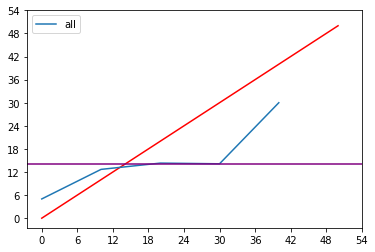

In [665]:
# --------------------
# BIAS
# - BM - Insta
# --------------------
# HOW DOES AI PERCEIVE AGE?
# 1) Perceived age in general

import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv

countries = {
    "australia": "0",
    "brazil": "1",
    "canada": "2",
    "china": "3",
    "ethiopia": "4",
    "nigeria": "4",
    "germany": "5",
    "india": "6",
    "indonesia": "7",
    "iran": "8",
    "russia": "9"
}

output_data = []
output_data.append(['Label','Predicted Label','Label Age','Predicted Age','Adulthood'])

def plot_data(net, bin, country = 'all'):

    path = './data/processed/res/pickle_%s_bin_%s' %(net, bin)

    with open(path,'rb') as f:
        output = pickle.load(f)

        acc_age_shifts = {}
        acc_age_shifts_mean = {}
        acc_counts = {}
        acc_adj_age = {}
        acc_adj_bin = {}

        for i in range(0, 100):
            for result in output:
                path = result['path']                       # /folder/folder/folder/
                name = result['name']                       # 12_1_@justinbieber
                exact_age = name.split('_')[0]              # 21 years
                country_index = name.split('_')[1]                # 1 -> Germany TODO
                label_str = result['label-str']             # actual age10-19
                pred_label_str = result['pred-label-str']   # perceived age20-29
                label_num = result['label-num']             # 1
                pred_label_num = result['pred-label-num']   # 2
                probs = result['probs']                     # [%, %, ..., %]
                shift = pred_label_num - label_num 
                country_name = list(countries.keys())[list(countries.values()).index(country_index)]
                if country == country_name or country == 'all': 
                    if label_num not in acc_age_shifts.keys():
                        acc_age_shifts[label_num] = 0
                        acc_age_shifts_mean[label_num] = 0
                        acc_counts[label_num] = 0  
                    if label_num == i:
                        acc_age_shifts[label_num] += shift
                        acc_counts[label_num] += 1
                        
    for label_num in acc_age_shifts.keys():
        new_num = label_num * bin
        acc_adj_age[new_num] = 0
        acc_adj_bin[label_num] = 0
        
        acc_age_shifts_mean[label_num] = acc_age_shifts[label_num] / acc_counts[label_num]
        acc_adj_age[new_num] = (label_num + acc_age_shifts_mean[label_num]) * bin
        acc_adj_bin[label_num] = (label_num + acc_age_shifts_mean[label_num])
        
        adult = [pred_age for age, pred_age in acc_adj_age.items() if age == 18]
#         adult = [pred_age for age, pred_age in acc_adj_age.items() if age == 18]
        
        output_data.append([label_num,acc_adj_bin[label_num],new_num,acc_adj_age[new_num], adult])

        
    vals = acc_adj_age.keys()        
    lists = sorted(acc_adj_age.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples

    b = np.linspace(0,50)
    a = b
    plt.plot(a, b, color = 'red')
    plt.plot(x,y, label = country)
#         plt.axvline(x = 18, color = 'purple')
    plt.axhline(y = adult, color = 'purple')

    plt.yticks(np.arange(0, 60, 6.0))
    plt.xticks(np.arange(0, 60, 6.0))
    plt.legend()
    

    
    filename = 'countries/general_%s_%s_%s.csv' %(net, bin, country)
    with open(filename, 'w') as f:
        w = csv.writer(f)
        w.writerows(output_data)

    print(acc_adj_age)
#---------------------------
# ALL RACES
#---------------------------

plot_data('ResNet',10,'all')

# HOW DOES AI PERCEIVE AGE OF DIFFERENT RACES?
# 2) Perceived age per race

#---------------------------
# EUROPEAN
#---------------------------

# plot_data('ResNet',6,'australia')
# plot_data('ResNet',1,'canada')
# plot_data('ResNet',10,'germany')
# plot_data('ResNet',10,'russia')

#---------------------------
# ASIAN
#---------------------------

# plot_data('ResNet',10,'china')
# plot_data('ResNet',10,'india')
# plot_data('ResNet',10,'indonesia')

#---------------------------
# MIDDLE EAST
#---------------------------

# plot_data('ResNet',10,'iran')

#---------------------------
# AFRICAN
#---------------------------

# plot_data('ResNet',10,'ethiopia')

#---------------------------
# HISPANIC
#---------------------------

# plot_data('ResNet',10,'brazil')


### Age Authentication

{10: 0.6788321167883211, 20: 0.525, 30: 0.5}


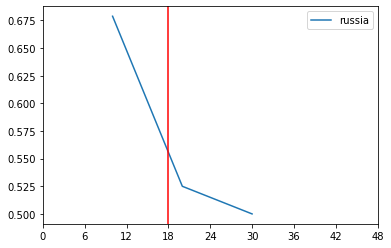

In [695]:
# --------------------
# BIAS
# - BM - Insta 
# --------------------

# HOW DOES AI PERCEIVE AGE AT A GIVEN THRESHOLD?
 
# 4) Perceived age per race at and around thresholdkeys

import pickle
# import pandas as pd
# import numpy

countries = {
    "australia": "0",
    "brazil": "1",
    "canada": "2",
    "china": "3",
    "ethiopia": "4",
    "nigeria": "4",
    "germany": "5",
    "india": "6",
    "indonesia": "7",
    "iran": "8",
    "russia": "9"
}

output_data = []
output_data.append(['Label','Label Age','Accuracy'])

def plot_binary_data(net, bin, country = 'all'):

    path = './data/processed/res/pickle_%s_bin_%s' %(net, bin)

    with open(path,'rb') as f:
        output = pickle.load(f)

        acc_age_correct = {}
        acc_age_total = {}
        acc_age_mean = {}

        for result in output:
            path = result['path']                       
            name = result['name']                       
            exact_age = name.split('_')[0]              
            country_index = name.split('_')[1]          
            label_str = result['label-str']             
            pred_label_str = result['pred-label-str']   
            label_num = result['label-num']             
            pred_label_num = result['pred-label-num']   
            probs = result['probs']            
            country_name = list(countries.keys())[list(countries.values()).index(country_index)]

            adulthood = 18 / bin
            is_adult = label_num >= adulthood 
            is_pred_adult = pred_label_num >= adulthood 
            if country == country_name or country == 'all': 
                
                if label_num not in acc_age_correct.keys():
                    acc_age_correct[label_num] = 0
                    acc_age_total[label_num] = 0
                 
                if is_adult == is_pred_adult:
                    acc_age_correct[label_num] += 1

                acc_age_total[label_num] += 1

    for label_num in acc_age_correct.keys():
        new_num = label_num * bin       
        acc_age_mean[new_num] = 0
        acc_age_mean[new_num] = acc_age_correct[label_num] / acc_age_total[label_num]
        output_data.append([label_num,new_num,acc_age_mean[new_num]])
        
    print(acc_age_mean)

    vals = acc_age_mean.keys()        
    lists = sorted(acc_age_mean.items())
    x, y = zip(*lists)
        
    plt.plot(x,y, label = country)
    plt.xticks(np.arange(0, 50, 6.0))
    plt.axvline(x = 18, color = 'red')

    plt.legend()

    filename = 'countries/binary_%s_%s_%s.csv' %(net, bin, country)
    with open(filename, 'w') as f:
        w = csv.writer(f)
        w.writerows(output_data)

#---------------------------
# ALL RACES
#---------------------------

# plot_binary_data('ResNet',6,'all')

# HOW DOES AI PERCEIVE AGE OF DIFFERENT RACES?
# 2) Perceived age per race

#---------------------------
# EUROPEAN
#---------------------------

# plot_binary_data('ResNet',10,'australia')
# plot_binary_data('ResNet',10,'canada')
# plot_binary_data('ResNet',10,'germany')
plot_binary_data('ResNet',10,'russia')

#---------------------------
# ASIAN
#---------------------------

# plot_binary_data('ResNet',10,'china')
# plot_binary_data('ResNet',10,'india')
# plot_binary_data('ResNet',10,'indonesia')

#---------------------------
# MIDDLE EAST
#---------------------------

# plot_binary_data('ResNet',10,'iran')

#---------------------------
# AFRICAN
#---------------------------

# plot_binary_data('ResNet',10,'ethiopia')

#---------------------------
# HISPANIC
#---------------------------

# plot_binary_data('ResNet',10,'brazil')